Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

In Kaggle Datasets' inaugural Data Science for Good challenge, Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. Unlike traditional machine learning competitions with rigid evaluation criteria, participants will develop their own creative approaches to addressing the objective. Instead of making a prediction file as in a supervised machine learning problem, submissions in this challenge will take the form of Python and/or R data analyses using Kernels, Kaggle's hosted Jupyter Notebooks-based workbench.

Kiva has provided a dataset of loans issued over the last two years, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. Participants will write kernels on this dataset to submit as solutions to this objective and five winners will be selected by Kiva judges at the close of the event. In addition, awards will be made to encourage public code and data sharing. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

The sections that follow describe in more detail how to participate, win, and use available resources to make a contribution towards helping Kiva better understand and help entrepreneurs around the world.

Problem Statement
For the locations in which Kiva has active loans, your objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

Kernels submitted will be evaluated based on the following criteria:

1. Localization - How well does a submission account for highly localized borrower situations? Leveraging a variety of external datasets and successfully building them into a single submission will be crucial.

2. Execution - Submissions should be efficiently built and clearly explained so that Kiva’s team can readily employ them in their impact calculations.

3. Ingenuity - While there are many best practices to learn from in the field, there is no one way of using data to assess welfare levels. It’s a challenging, nuanced field and participants should experiment with new methods and diverse datasets.

### Introduction
Kiva.org is an online crowdfunding platform dedicated to extend financial services to poor people around the World.

Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans.

How Kiva works?
The lending process by Kiva is simple, following just few steps:

The borrower mets with a Field Partner of Kiva and requests a loan;

The Field Partner disburses a loan to the borrower;

The Field Partner uploads the loan request to Kiva. The request is reviewed by a team of volunteer editors and translators and then published on Kiva.org;

Kiva lenders found the loan request, and Kiva sends the loan to the Field Partner;

The borrower makes repayments and the Field Partner send funds owed to Kiva. Kiva repays lenders;

The lenders can make another loan, donate to Kiva or withdraw their money to their PayPal account. 70% of the lenders choose to fund another loan.

In this Kernel we will explore the data provided by Kiva, trying to understand the welfare condition of Kiva borrowers.

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode


In [244]:
kiva_loans=pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\kiva_loans.csv")
kiva_location=pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\kiva_mpi_region_locations.csv")
loan_theme=pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\loan_theme_ids.csv")
loan_themes_by_region=pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\loan_themes_by_region.csv")
country_profile_variables_df=pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\country_profile_variables.csv")
kiva_country_profiles_variables_df =pd.read_csv(r"C:\Users\Anurag Mohanta\OneDrive\Desktop\kiva\kiva_country_profile_variables.csv")

BASIC DATA EXPLORATION

In [7]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [8]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [19]:
kiva_loans.shape

(671205, 20)

kiva_loans data set contations 671205 rows and 20 columns

In [20]:
kiva_loans.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

Total number of missing values in below columns
use  :                   4232,
region :                 56800,
partner_id :             13507,
disbursed_time :         2396,
funded_time  :          48331,
tags :                 171416,
borrower_genders :       4221

In [22]:
kiva_loans.isna().sum()/len(kiva_loans)*100


id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
dtype: float64

In [9]:
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


Total number of lender is 671205

In [12]:
kiva_loans["funded_amount"].sum()

527563815.0

In [14]:
kiva_loans["loan_amount"].sum()

565421150.0

In [23]:
kiva_loans["loan_amount"].sum()-kiva_loans["funded_amount"].sum()

37857335.0

Total 37857335.0 amount is available for funding 

In [31]:
kiva_location.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [32]:
kiva_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [33]:
kiva_location.isna().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [34]:
kiva_location.isna().sum()/len(kiva_location)*100

LocationName    64.502165
ISO             63.636364
country         63.636364
region          64.502165
world_region    63.636364
MPI             64.502165
geo              0.000000
lat             67.821068
lon             67.821068
dtype: float64

There are number of missing values across columns


Around 64 % of the data is missing in location.But from column geo we can find all other data.

In [35]:
kiva_location.describe()

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


In [36]:
loan_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [42]:
loan_theme.shape

(779092, 4)

In [37]:
loan_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [38]:
loan_theme.isnull().sum()/len(loan_theme)

id                 0.000000
Loan Theme ID      0.019013
Loan Theme Type    0.019013
Partner ID         0.019013
dtype: float64

In [39]:
loan_theme.isnull().sum()/len(loan_theme)*100

id                 0.000000
Loan Theme ID      1.901316
Loan Theme Type    1.901316
Partner ID         1.901316
dtype: float64

1.9 % OF Data is missing across columns.

In [40]:
loan_themes_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [88]:
def basic_exploration(df):
    print("{df}.head()")
    print(df.head())
    print("--"*30)

    print("{df}.shape")
    print(df.shape)
    print("Number of rows :",df.shape[0])
    print("Number of columns :",df.shape[1])
    print("--"*30)

    print("df.info()")
    print(df.info())
    print("--"*30)

    print(df.describe())
    print("--"*30)

    print(df.isnull().sum())
    print("--"*30)

    print(df.isnull().sum().sum())
    print("--"*30)

    print(df.isnull().sum().sum() / df.shape[0])

In [93]:
from IPython.display import display, Markdown

In [73]:
display(loan_themes_by_region.shape)

(15736, 21)

In [123]:
data = [
    ("kiva_loans", kiva_loans),
    ("kiva_location", kiva_location),
    ("loan_theme", loan_theme),
    ("loan_themes_by_region", loan_themes_by_region)
]


In [138]:
from IPython.display import display, Markdown

def basic_exploration(df, df_name):
    print(df_name)

    # Display DataFrame head with Markdown header
    display(Markdown(f"### {df_name}"))
    display(df.head())

    # Display DataFrame shape
    display(Markdown(f"### {df_name}:shape"))
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])

    # Display DataFrame info
    display(Markdown(f"### {df_name}:information"))
    display(df.info())

    # Display DataFrame description
    display(Markdown(f"### {df_name}:Description"))
    display(df.describe())

    # Display number of null values per column
    display(Markdown(f"### {df_name}:Null Values per Column"))
    display(df.isnull().sum())

    # Display percentage of null values relative to total rows
    display(Markdown(f"### {df_name}: Percentage of Null Values"))
    display(df.isnull().sum() / df.shape[0]*100)




In [139]:
for name, df in data:
    basic_exploration(df, name)

kiva_loans


### kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


### kiva_loans:shape

Number of rows: 671205
Number of columns: 20


### kiva_loans:information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

None

### kiva_loans:Description

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


### kiva_loans:Null Values per Column

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

### kiva_loans: Percentage of Null Values

id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
dtype: float64

kiva_location


### kiva_location

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


### kiva_location:shape

Number of rows: 2772
Number of columns: 9


### kiva_location:information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


None

### kiva_location:Description

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


### kiva_location:Null Values per Column

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

### kiva_location: Percentage of Null Values

LocationName    64.502165
ISO             63.636364
country         63.636364
region          64.502165
world_region    63.636364
MPI             64.502165
geo              0.000000
lat             67.821068
lon             67.821068
dtype: float64

loan_theme


### loan_theme

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


### loan_theme:shape

Number of rows: 779092
Number of columns: 4


### loan_theme:information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


None

### loan_theme:Description

,id,Partner ID
count,7.790920e+05,764279.000000
mean,1.047475e+06,180.825840
std,2.282538e+05,97.914029
min,6.386310e+05,9.000000
25%,8.499768e+05,126.000000
50%,1.046528e+06,145.000000
75%,1.244768e+06,204.000000
max,1.444243e+06,557.000000


### loan_theme:Null Values per Column

id                     0
Loan Theme ID      14813
Loan Theme Type    14813
Partner ID         14813
dtype: int64

### loan_theme: Percentage of Null Values

id                 0.000000
Loan Theme ID      1.901316
Loan Theme Type    1.901316
Partner ID         1.901316
dtype: float64

loan_themes_by_region


### loan_themes_by_region

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


### loan_themes_by_region:shape

Number of rows: 15736
Number of columns: 21


### loan_themes_by_region:information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

None

### loan_themes_by_region:Description

,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484101,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


### loan_themes_by_region:Null Values per Column

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                      14
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

### loan_themes_by_region: Percentage of Null Values

Partner ID             0.000000
Field Partner Name     0.000000
sector                 0.000000
Loan Theme ID          0.000000
Loan Theme Type        0.000000
country                0.000000
forkiva                0.000000
region                 0.000000
geocode_old           92.374174
ISO                    0.088968
number                 0.000000
amount                 0.000000
LocationName           0.000000
geocode               13.179969
names                 13.186324
geo                    0.000000
lat                   13.179969
lon                   13.179969
mpi_region             0.088968
mpi_geo               38.542196
rural_pct              8.845958
dtype: float64

### Loans in Number

In [144]:
Markdown("""
Let’s explore now into more details the loans information.  
There are a number of **{}** loans, grouped in **{}** sectors, for **{}** activities, in **{}** countries and in **{}** different regions.  
The funded amounts are between **{}** and **{}** while the loan amount is between **{}** and **{}**, in **{}** different currencies.  
The term in months for repayment of loan ranges from **{}** to **{}** months.   
<font color="#64a444">  

Let’s represent all sectors, and top 20 for activities, countries and regions by number of loans.
""".format(kiva_loans.shape[0], 
        kiva_loans.sector.nunique(),
        kiva_loans.activity.nunique(),
        kiva_loans.country.nunique(),
        kiva_loans.region.nunique(),
        kiva_loans.funded_amount.min(),
        kiva_loans.funded_amount.max(),
        kiva_loans.loan_amount.min(),
        kiva_loans.loan_amount.max(),
        kiva_loans.currency.nunique(),
        kiva_loans.term_in_months.min(),
        kiva_loans.term_in_months.max())
)



Let’s explore now into more details the loans information.  
There are a number of **671205** loans, grouped in **15** sectors, for **163** activities, in **87** countries and in **12695** different regions.  
The funded amounts are between **0.0** and **100000.0** while the loan amount is between **25.0** and **100000.0**, in **67** different currencies.  
The term in months for repayment of loan ranges from **1.0** to **158.0** months.   
<font color="#64a444">  

Let’s represent all sectors, and top 20 for activities, countries and regions by number of loans.


<Figure size 640x480 with 0 Axes>

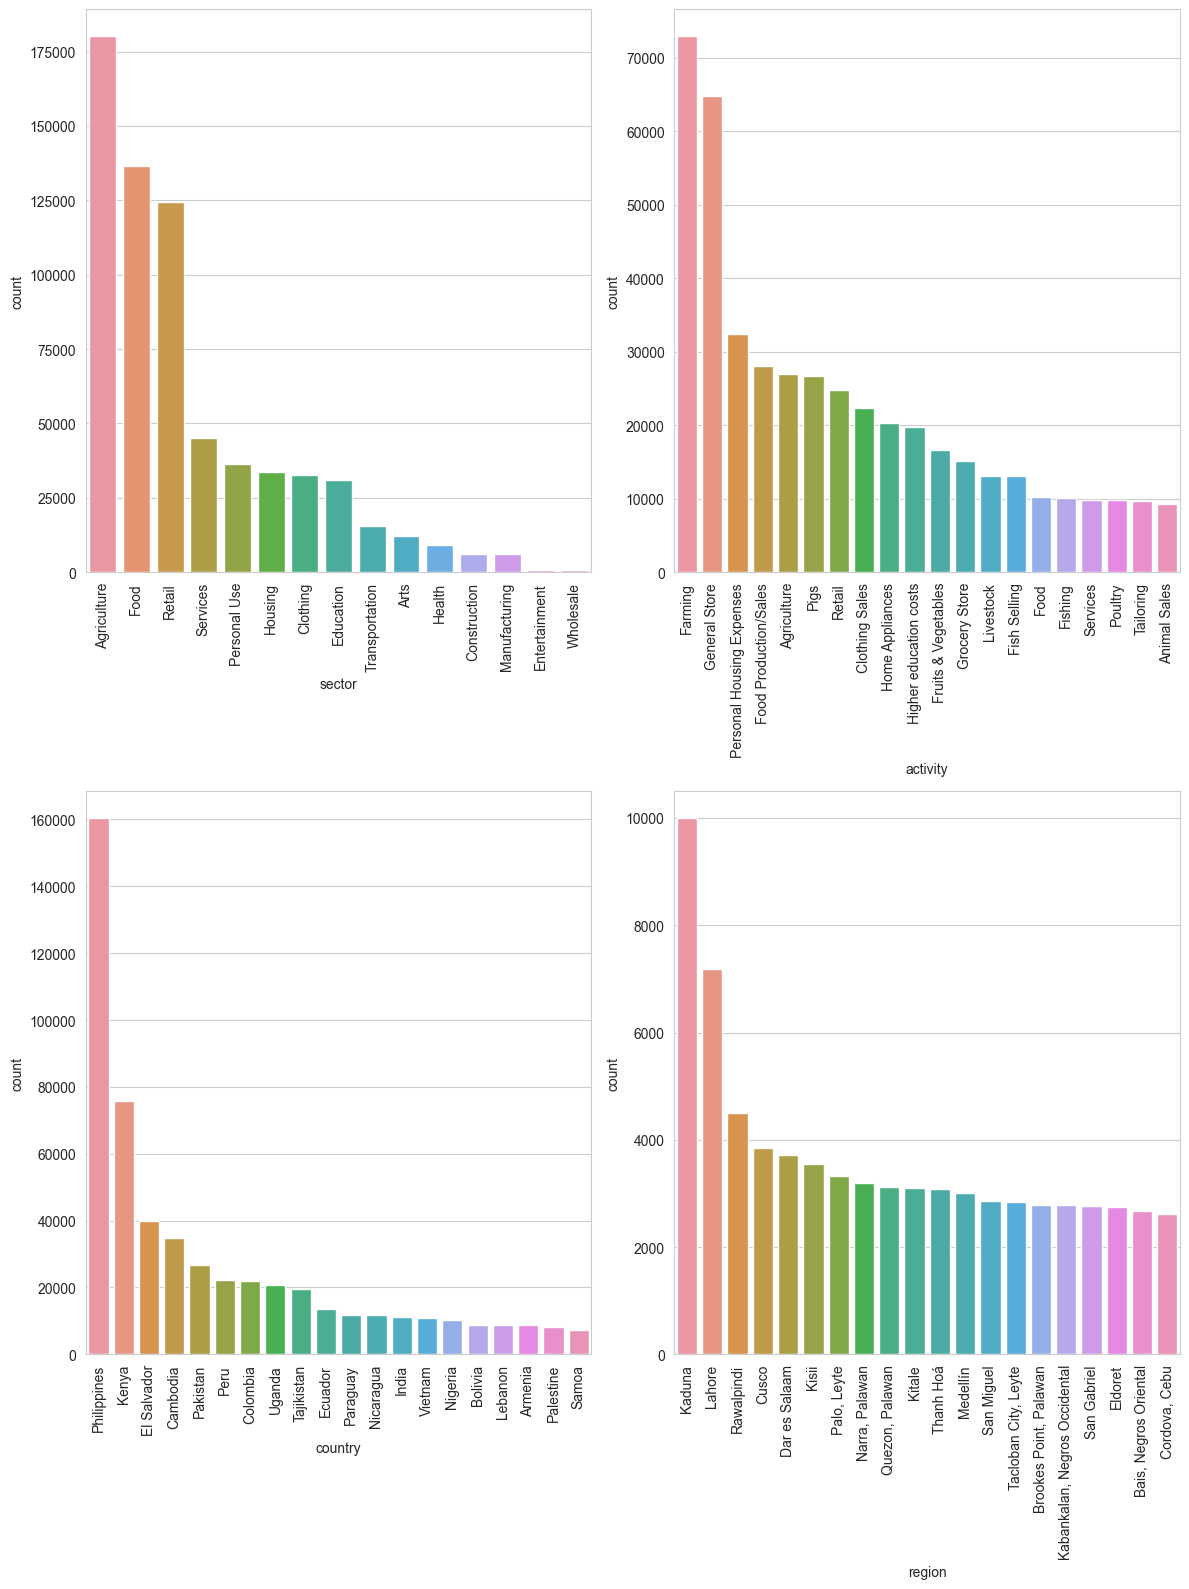

In [160]:


plt.figure()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))

df = kiva_loans.groupby(["sector"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df = df.sort_values(by="count", ascending=False)
sectors = sns.barplot(x=df['sector'], y=df['count'], ax=axs[0, 0])
sectors.set_xticklabels(sectors.get_xticklabels(), rotation=90)

df2 = kiva_loans.groupby(["activity"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df2 = df2.sort_values(by="count", ascending=False)
df2 = df2[0:20]
activities = sns.barplot(x=df2['activity'], y=df2['count'], ax=axs[0, 1])
activities.set_xticklabels(activities.get_xticklabels(), rotation=90)

df3 = kiva_loans.groupby(["country"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df3 = df3.sort_values(by="count", ascending=False)
df3 = df3[0:20]
countries = sns.barplot(x=df3['country'], y=df3['count'], ax=axs[1, 0])
countries.set_xticklabels(countries.get_xticklabels(), rotation=90)

df4 = kiva_loans.groupby(["region"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df4 = df4.sort_values(by="count", ascending=False)
df4 = df4[0:20]
regions = sns.barplot(x=df4['region'], y=df4['count'], ax=axs[1, 1])
regions.set_xticklabels(regions.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


First three sectors in termns of number of loans are Agriculture, Food, Retail, all with over 100,000 loans.

The first two activities are Farming and General Store, both with over 60,000 loans. Philippines is dominating the countries top, with over 150,000 loans, followed, at large distance, by Kenya and El Salvador. The top 3 identified regions are Kaduna, Lahore and Rawalpindi.

Most of the loans are registered under unknown region (we can suppose that most of them will go to Philippines, but we will have to verify this).

### Loans per country and region

Let’s represent now the number of loans aggregated per country and region, as a treemap. We will filter only the first 100 entries/country. To show more than 100 entries/country is not necessary, since it will became very difficult to visualize (and is also using a lot of resources).

df = kiva_loans_df.groupby(["country", "region"])["loan_amount"].agg(["count"]).reset_index() df = df.sort_values(by=["country", "count"], ascending=False) df = df.groupby(["country"]).head(100) df.columns = ["Country", "Region", "Number of loans"] fig = px.treemap(df, path=['Country', 'Region'], values='Number of loans', color='Number of loans', hover_data=['Country'], color_continuous_scale="Greens", color_continuous_midpoint=np.average(df['Number of loans'], weights=df['Number of loans'])) fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000, title="Loans per country and region (top 100 regions per country)") fig.show()

In [171]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [176]:
import plotly.express as px
df = kiva_loans.groupby(["country", "region"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["country", "count"], ascending=False) 
df = df.groupby(["country"]).head(100) 


df.columns = ["Country", "Region", "Number of loans"] 


fig = px.treemap(df, path=['Country', 'Region'],
values='Number of loans', color='Number of loans', 
hover_data=['Country'], color_continuous_scale="Greens",
color_continuous_midpoint=np.average(df['Number of loans'], 
weights=df['Number of loans'])) 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000,
title="Loans per country and region (top 100 regions per country)")
fig.show()

In [177]:
df = kiva_loans.groupby(["country", "country_code"])["loan_amount"].agg(["count"]).reset_index()

In [180]:
import country_converter as cc

In [183]:
df = kiva_loans.groupby(["country", "country_code"])["loan_amount"].agg(["count"]).reset_index()
df['iso_alpha'] = df.country_code.apply(lambda x: cc.convert(x, to='ISO3'))
fig = px.choropleth(df,locations='iso_alpha', color='count',
                           color_continuous_scale="Greens",
                           scope="world",
                           labels={'count':'Number of loans'}
                          )
fig.update_layout(title='Kiva : Loans per Country')
fig.show()

### Loans per sector ans activity

Let’re represent now the treemap for the couple {sectors, activities}, showing the size and color of tiles proportional with the number of loans.

In [185]:
df = kiva_loans.groupby(["sector", "activity"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["sector", "activity"], ascending=False)
df.columns = ["Sector", "Activity", "Number of loans"]
fig = px.treemap(df, path=["Sector", "Activity"],
values='Number of loans', color='Number of loans', hover_data=['Sector'],
color_continuous_scale="Greens",
color_continuous_midpoint=np.average(df['Number of loans'],
weights=df['Number of loans'])) 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),
height=1000, title="Loans per sector and activity") 
fig.show()

### Loans currencies


Let’s see now what are the currencies in which these loans are given. First, let's look for the currency used in each country.

In [186]:
df = kiva_loans.groupby(["country", "currency"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["country", "currency"], ascending=False)
df.columns = ["Country", "Currency", "Number of loans"]
fig = px.treemap(df, path=["Country", "Currency"],
values='Number of loans', color='Number of loans',
hover_data=['Country'], color_continuous_scale="Greens",
color_continuous_midpoint=np.average(df['Number of loans'],
weights=df['Number of loans'])) 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),
height=1000, title="Loans per country and currency")
fig.show()

Most of the loans are in PHP (for Philippines - which is natural, since Phillipines has most of the loans) and in USD (El Salvador, Ecuador, Palestine, Lebanon, United States, Cambodia, Nicaragua).

Let’s check as well the distribution of loan amount for the loans in USD, the term in months and the repayment interval.

We start with the distribution of loan amount for the loans in USD, grouped by sectors. We will also remove upper 99% quantile.

In [193]:
q99 = np.quantile(kiva_loans.loan_amount, 0.99)
df = kiva_loans.loc[(kiva_loans.currency=="USD") & (kiva_loans.loan_amount < q99)][["sector", "loan_amount", "currency"]]

In [198]:
df = kiva_loans.loc[kiva_loans.currency=="USD"].groupby(["country"])["loan_amount"].sum().reset_index()

In [199]:
df['iso_alpha'] = df.country.apply(lambda x: cc.convert(x, to='ISO3'))
fig = px.choropleth(df,locations='iso_alpha', color='loan_amount',
                           color_continuous_scale="Greens",
                           scope="world",
                           labels={'loan_amount':'Total loans amount'}
                          )
fig.update_layout(title='Kiva:Loans per country ')
fig.show()

Virgin Islands not found in regex


### Loan repayment term


We follow with the distribution of the loan repayment term (in months), grouped by sectors.

In [209]:
def draw_trace(dataset, sector, feature):
    dfS = dataset[dataset['sector']==sector]
    trace = go.Box( x = dfS[feature], name=sector, marker=dict( line=dict( color='black', width=0.8), ), text=dfS['sector'], )
    return trace

In [210]:
def draw_group(dataset, feature, title, feature_title, sectors, height=800):
    data = []
    for sector in sectors:
        data.append(draw_trace(dataset, sector, feature))


In [211]:
draw_group(kiva_loans, "term_in_months", "Loans repayment terms per sector", 'Loans repayment terms (months)', kiva_loans.sector.unique())

In [214]:
data

[('kiva_loans',
               id  funded_amount  loan_amount             activity  \
  0        653051          300.0        300.0  Fruits & Vegetables   
  1        653053          575.0        575.0             Rickshaw   
  2        653068          150.0        150.0       Transportation   
  3        653063          200.0        200.0           Embroidery   
  4        653084          400.0        400.0           Milk Sales   
  ...         ...            ...          ...                  ...   
  671200  1340323            0.0         25.0            Livestock   
  671201  1340316           25.0         25.0            Livestock   
  671202  1340334            0.0         25.0                Games   
  671203  1340338            0.0         25.0            Livestock   
  671204  1340339            0.0         25.0            Livestock   
  
                  sector                                                use  \
  0                 Food            To buy seasonal, fresh fru

### Loan repayment interval


We show here the number of loans for each Sector, grouped by repayment interval (monthly, irregular, weekly, bullet).

In [215]:
repayment_interval = kiva_loans.repayment_interval.unique()
repayment_interval

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [218]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [236]:
data = []
cl =[5, 2, 1, 4]
for i, ry in enumerate(repayment_interval):
    df = kiva_loans.loc[kiva_loans.repayment_interval==ry]
    df = df.groupby("sector")["loan_amount"].count().reset_index()
    df.columns = ["sector", "loans"]
    trace = go.Bar(
        x = df['sector'],y = df['loans'],
        name=ry,
         marker=dict(
                    color=color_list[cl[i]],
                    line=dict(
                        color=color_list[cl[i]],
                        width=2),
                    opacity=0.9,
                ),
        text= df['sector'],
    )
    data.append(trace)
    
layout = dict(title = 'Loans per sector and repayment interval',
          xaxis = dict(title = 'Sector', showticklabels=True), 
          yaxis = dict(title = 'Loans'),
          hovermode = 'closest',
          #barmode='stack',
          height=800,
          width=1200
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='sector-repayment-interval')

### Loan borowers

In [237]:
def get_gender_count(text,gen="female"):
    count = 0
    try:
        text = text.split(",")
        for t in text:
            if gen == t.rstrip().lstrip():
                count+=1
    except:
        return count
        
    return count
kiva_loans["n_male"] = kiva_loans["borrower_genders"].apply(lambda x: get_gender_count(x, "male"))
kiva_loans["n_female"] = kiva_loans["borrower_genders"].apply(lambda x: get_gender_count(x, "female"))

In [238]:
kiva_loans["borrower_gen"] = "Not specified"
kiva_loans.loc[(kiva_loans.n_male !=0) & (kiva_loans.n_female ==0), "borrower_gen"] = "Male"
kiva_loans.loc[(kiva_loans.n_male ==0) & (kiva_loans.n_female !=0), "borrower_gen"] = "Female"
kiva_loans.loc[(kiva_loans.n_male !=0) & (kiva_loans.n_female !=0), "borrower_gen"] = "Female & Male"

df = kiva_loans.groupby("borrower_gen")["loan_amount"].count().reset_index()
df.columns = ["Borrower Gender", "Number of loans"]
df.sort_values(by="Number of loans", ascending=False)
trace = go.Bar(
    x = df["Borrower Gender"],y = df['Number of loans'],
    marker=dict(
                color=color_list[3],
                line=dict(
                    color=color_list[5],
                    width=1),
                opacity=0.9,
            ),
)
data = [trace]
    
layout = dict(title = 'Loans per borrower gender',
          xaxis = dict(title = 'Borrower genders', showticklabels=True), 
          yaxis = dict(title = 'Loans'),
          hovermode = 'closest',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='borrower-genders')

In [242]:

df = kiva_loans.loc[kiva_loans.n_female>0]
df = df.groupby(["sector"])["n_female"].agg(["count", "mean", "max"]).reset_index()
df = df.sort_values(by="mean", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['mean'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = kiva_loans.loc[kiva_loans.n_male>0]
df2 = df2.groupby(["sector"])["n_male"].agg(["count", "mean", "max"]).reset_index()
df2 = df2.sort_values(by="mean", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['mean'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Average number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()

In [243]:
df = df.sort_values(by="max", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['max'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = df2.sort_values(by="max", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['max'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Maximum number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()